In [1]:
import pickle

with open('undersampled_data.pkl', 'rb') as lf:
    labels = pickle.load(lf)

with open('undersampled_posts.pkl', 'rb') as pf:
    posts = pickle.load(pf)

In [2]:
# Tokenizing data
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
import numpy as np

max_len = 50
max_features = 10000
test_samples = 1500
max_words = 10000

Using TensorFlow backend.


In [3]:
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(posts)
sequences = tokenizer.texts_to_sequences(posts)
word_index = tokenizer.word_index
print('Found %s unique tokens' % len(word_index))

Found 29926 unique tokens


In [4]:
data = pad_sequences(sequences, maxlen=max_len)
labels = np.asarray(labels)

In [5]:
print('Shape of data tensor:', data.shape)
print('Shape of label tensor:', labels.shape)

Shape of data tensor: (28800, 50)
Shape of label tensor: (28800,)


In [6]:
indices = np.arange(data.shape[0])
np.random.shuffle(indices)
data = data[indices]
labels = labels[indices]

In [7]:
type_dictionary = {
    '0000':'INTJ',
    '0001':'INTP',
    '0010':'INFJ',
    '0011':'INFP',
    '0100':'ISTJ',
    '0101':'ISTP',
    '0110':'ISFJ',
    '0111':'ISFP',
    '1000':'ENTJ',
    '1001':'ENTP',
    '1010':'ENFJ',
    '1011':'ENFP',
    '1100':'ESTJ',
    '1101':'ESTP',
    '1110':'ESFJ',
    '1111':'ESFP',
}

type_labels=['INTJ','INTP','INFJ','INFP','ISTJ','ISTP','ISFJ','ISFP', \
        'ENTJ','ENTP','ENFJ','ENFP','ESTJ','ESTP','ESFJ','ESFP',]

one_hot_types = []

for label in labels:
    bin_type = []
    
    if (label[0] == 'I'):
        bin_type.append(0)
    else:
        bin_type.append(1)
        
    if (label[1] == 'N'):
        bin_type.append(0)
    else:
        bin_type.append(1)
        
    if (label[2] == 'T'):
        bin_type.append(0)
    else:
        bin_type.append(1)
        
    if (label[3] == 'J'):
        bin_type.append(0)
    else:
        bin_type.append(1)
        
    one_hot_types.append(bin_type)

In [8]:
y = np.asarray(one_hot_types).astype('float32')

x_test = data[:test_samples]
y_test = y[:test_samples]

x_train = data[test_samples:]
y_train = y[test_samples:]

In [9]:
from keras.models import Sequential
from keras import layers, regularizers
from keras.optimizers import RMSprop

model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(4))

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

history = model.fit(x_train, y_train,
                    epochs=30,
                    batch_size=128,
                    validation_split=0.2)

Train on 21840 samples, validate on 5460 samples
Epoch 1/30
21840/21840 [==============================] - 9s 393us/step - loss: 0.9107 - acc: 0.5001 - val_loss: 0.6978 - val_acc: 0.4959
Epoch 2/30
21840/21840 [==============================] - 8s 364us/step - loss: 0.6900 - acc: 0.5334 - val_loss: 0.6906 - val_acc: 0.5250
Epoch 3/30
21840/21840 [==============================] - 8s 368us/step - loss: 0.6844 - acc: 0.5577 - val_loss: 0.6889 - val_acc: 0.5310
Epoch 4/30
21840/21840 [==============================] - 8s 368us/step - loss: 0.6795 - acc: 0.5747 - val_loss: 0.6869 - val_acc: 0.5402
Epoch 5/30
21840/21840 [==============================] - 8s 374us/step - loss: 0.6745 - acc: 0.5904 - val_loss: 0.6850 - val_acc: 0.5474
Epoch 6/30
21840/21840 [==============================] - 8s 370us/step - loss: 0.6690 - acc: 0.6027 - val_loss: 0.6835 - val_acc: 0.5505
Epoch 7/30
21840/21840 [==============================] - 8s 372us/step - loss: 0.6632 - acc: 0.6158 - val_loss: 0.6814 - v

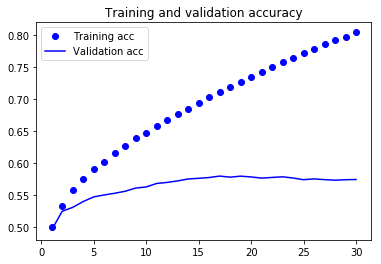

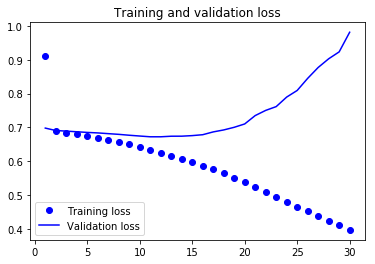

In [11]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [12]:
model = Sequential()
model.add(layers.Embedding(max_features, 128, input_length=max_len))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.MaxPooling1D(5))
model.add(layers.Conv1D(32, 7, activation='relu'))
model.add(layers.GlobalMaxPooling1D())
model.add(layers.Dense(4))

model.compile(optimizer=RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['acc'])

model.fit(x_train, y_train,
                    epochs=17,
                    batch_size=128)

y_pred = model.predict(x_test)
results = model.evaluate(x_test, y_test)
results

Epoch 1/17
27300/27300 [==============================] - 10s 381us/step - loss: 0.9789 - acc: 0.5041
Epoch 2/17
27300/27300 [==============================] - 10s 349us/step - loss: 0.6888 - acc: 0.5346
Epoch 3/17
27300/27300 [==============================] - 10s 368us/step - loss: 0.6825 - acc: 0.5590
Epoch 4/17
27300/27300 [==============================] - 9s 340us/step - loss: 0.6761 - acc: 0.5725
Epoch 5/17
27300/27300 [==============================] - 9s 337us/step - loss: 0.6690 - acc: 0.5912
Epoch 6/17
27300/27300 [==============================] - 9s 339us/step - loss: 0.6609 - acc: 0.6076
Epoch 7/17
27300/27300 [==============================] - 9s 343us/step - loss: 0.6520 - acc: 0.6222
Epoch 8/17
27300/27300 [==============================] - 10s 380us/step - loss: 0.6429 - acc: 0.6361
Epoch 9/17
27300/27300 [==============================] - 9s 342us/step - loss: 0.6344 - acc: 0.6451
Epoch 10/17
27300/27300 [==============================] - 9s 348us/step - loss: 0.6257

[0.7118242851893107, 0.5864999995231629]

In [19]:
for i in range(0, len(y_pred)):
    if 2.0 is in y_pred[i]:
        print(i)

SyntaxError: invalid syntax (<ipython-input-19-49cc38274b40>, line 2)

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import itertools
import datetime

now = datetime.datetime.now()
pictures = []
folder = "1DCNN"

def byte_to_mbti(byte):
    binary = ''
    for letter in byte:
         binary +=(str(int(letter)))        
    return type_dictionary[binary]

decoded_y_true = [byte_to_mbti(label) for label in y_test.round()]
decoded_y_pred = [byte_to_mbti(label) for label in y_pred.round()]

matrix = confusion_matrix(decoded_y_true, decoded_y_pred, labels=type_labels)
matrix_I_E = confusion_matrix(y_test[:,0], y_pred[:,0].round(), labels=[0, 1])
matrix_N_S = confusion_matrix(y_test[:,1], y_pred[:,1].round(), labels=[0, 1])
matrix_T_F = confusion_matrix(y_test[:,2], y_pred[:,2].round(), labels=[0, 1])
matrix_J_P = confusion_matrix(y_test[:,3], y_pred[:,3].round(), labels=[0, 1])

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    
plt.figure(figsize=(15,10))
plot_confusion_matrix(matrix, classes=type_labels, normalize=True,
                      title='Confusion matrix')
name = str(folder) + "/" + str(now.month) + "-" + str(now.day) + "-" + \
str(now.hour) + "-" + str(now.minute) + "_" + "CM0.png"
plt.savefig(name)
plt.show()
pictures.append(name)

plt.clf()
plt.figure(figsize=(5,5))
plot_confusion_matrix(matrix_I_E, classes=["I", "E"], normalize=True,
                      title='I-E Confusion matrix')
name = str(folder) + "/" + str(now.month) + "-" + str(now.day) + "-" + \
str(now.hour) + "-" + str(now.minute) + "_" + "CM1.png"
plt.savefig(name)
plt.show()
pictures.append(name)

plt.clf()
plt.figure(figsize=(5,5))
plot_confusion_matrix(matrix_N_S, classes=["N", "S"], normalize=True,
                      title='N-S Confusion matrix')
name = str(folder) + "/" + str(now.month) + "-" + str(now.day) + "-" + \
str(now.hour) + "-" + str(now.minute) + "_" + "CM2.png"
plt.savefig(name)
plt.show()
pictures.append(name)

plt.clf()
plt.figure(figsize=(5,5))
plot_confusion_matrix(matrix_T_F, classes=["T", "F"], normalize=True,
                      title='T-F Confusion matrix')
name = str(folder) + "/" + str(now.month) + "-" + str(now.day) + "-" + \
str(now.hour) + "-" + str(now.minute) + "_" + "CM3.png"
plt.savefig(name)
plt.show()
pictures.append(name)

plt.clf()
plt.figure(figsize=(5,5))
plot_confusion_matrix(matrix_J_P, classes=["J", "P"], normalize=True,
                      title='J-P Confusion matrix')
name = str(folder) + "/" + str(now.month) + "-" + str(now.day) + "-" + \
str(now.hour) + "-" + str(now.minute) + "_" + "CM4.png"
plt.savefig(name)
plt.show()
pictures.append(name)

KeyError: '1210'